In [2]:
import os
import random
import torch

# 指定文件夹路径
folder_path = r'D:\Ultra-low-field-MRI-Scanner-main\hku__EMI\data\all_data'

# 获取文件夹中所有的 .pth 文件
all_pth_files = [f for f in os.listdir(folder_path) if f.endswith('.pth')]


# 随机选择一个 .pth 文件
random_pth_file = random.choice(all_pth_files)

# 构建文件的完整路径
file_path = os.path.join(folder_path, random_pth_file)

# 加载文件
dict = torch.load(file_path)

# 你可以在这里加载模型状态字典
# model.load_state_dict(model_state_dict)

print(f"加载的文件是: {random_pth_file}")


加载的文件是: tr_835.pth


以上实现的是随机抽取一个pth文件的功能

In [3]:

# 打印字典中的所有键值对
for key, value in dict.items():
    print(f"Key: {key}")
    print(f"Value Type: {type(value)}")
    
    # 打印整个值或部分内容
    print(f"Tensor Shape: {value.shape}")
    #print(value)  # 如果需要，可以打印整个张量
    
    print("-" * 50)  # 分隔每个键值对的输出


Key: k-space
Value Type: <class 'torch.Tensor'>
Tensor Shape: torch.Size([1, 2, 128, 10])
--------------------------------------------------
Key: label
Value Type: <class 'torch.Tensor'>
Tensor Shape: torch.Size([1, 2, 128])
--------------------------------------------------


上边内容为随机字典文件中的键值对，其中key键的部分为正常显示，但是由于值的部分过大，这里只显示出其shape

In [3]:
import torch

# 假设 content 是已经加载的字典，并且我们有 'k-space' 张量
k_space = content['k-space']  # shape: [1, 2, 128, 10]

# 去除批次维度
k_space = k_space.squeeze(0)  # shape: [2, 128, 10]

# 将数据分成10份，每份对应第10个维度的一列
num_splits = k_space.shape[-1]  # num_splits = 10

for i in range(num_splits):
    # 选择第 i 列的数据
    real_part = k_space[0, :, i]  # 实部: shape [128]
    imaginary_part = k_space[1, :, i]  # 虚部: shape [128]

    # 创建 2x128 的数组，将实部和虚部存储在其中
    combined = torch.vstack((real_part, imaginary_part))  # shape: [2, 128]

    # 显示提取的是第几行实部和虚部
    print(f"提取的是第 {i+1} 行的实部和虚部：")
    print(combined)
    print("-" * 50)


提取的是第 1 行的实部和虚部：
tensor([[-14.0585, -22.9557, -22.6609, -28.7019, -20.1074, -33.3620, -21.1740,
         -33.0753, -21.0962,  -1.8992,  -1.7219, -10.9134, -19.2286, -29.5436,
         -21.1668, -37.1402, -19.8147, -26.3495, -21.0705, -19.9957, -21.7807,
         -18.2938, -13.8002, -13.9296,  -8.6685,  -7.0986, -11.4853,  -1.7381,
           0.7668,  -1.2345,   1.8528,   9.4665,   6.4689,   9.0419,  18.3149,
          17.7167,  16.2029,  11.5583,  21.6766,  23.3315,  21.2551,  25.5487,
          27.3135,  24.2014,  27.1681,  26.2425,  28.9542,  29.6030,  24.2040,
          27.5202,  22.3176,  31.4251,  14.7647,  30.2204,   8.0295,  -3.1089,
           1.6843,   8.8535,  18.9034,  18.6814,  13.7224,  15.3465,  11.9012,
          10.4059,  -1.8327,  -0.0736,  -2.1945,  -8.3879,  -6.8543, -15.1753,
         -18.4690, -11.0141, -19.8071, -21.0779, -23.2910, -24.2901, -27.1143,
         -26.4636, -27.0784, -27.3211, -26.8962, -26.6282, -23.2877, -20.1039,
         -19.1244, -14.9121, -10.97

以上为提取10个线圈中某一个线圈的频率编码，并将其存入一个[2*128]的张量conbined里

In [4]:
import torch
import numpy as np

# 假设 combined 是从之前步骤中得到的 2x128 张量
# combined[0, :] 是实部，combined[1, :] 是虚部

# 1. 将实部和虚部组合成复数
complex_signal = combined[0, :] + 1j * combined[1, :]  # shape: [128]

# 2. 这里的实部和虚部本身就是复数域的内容，所以直接作为fft的结果进行分析

fft_result = complex_signal # np.fft.fft(complex_signal.numpy())  # 结果是频域表示的复数

# 3. 计算频谱的幅度和相位
magnitude_spectrum = np.abs(fft_result)  # 幅度
phase_spectrum = np.angle(fft_result)    # 相位

# 4. 打印分析结果
print("频谱的幅度 (Magnitude Spectrum):")
print(magnitude_spectrum)

print("频谱的相位 (Phase Spectrum):")
print(phase_spectrum)


频谱的幅度 (Magnitude Spectrum):
tensor([10.7400, 21.8826, 11.0610,  2.5170,  9.2428,  6.0828,  9.0850,  8.6416,
         7.6533,  8.3680, 11.0554, 25.0293, 21.6151,  8.2725, 19.7411,  8.6288,
        25.1354, 20.0569, 29.5101, 14.2643,  6.0380, 12.7198, 16.6476, 15.7786,
         2.9816, 21.6794, 18.7270, 23.8862, 37.4405, 19.2764,  8.8986, 10.9781,
        18.9091, 20.7150,  9.2504, 13.1704, 19.1112, 32.7429, 14.3277,  5.7177,
         7.9921, 12.6020, 12.5019, 17.1086, 15.6963, 12.8161, 31.9601, 17.5838,
        27.4176,  9.0695, 10.9263,  4.9673,  7.4875,  6.7449, 13.6672,  2.1689,
        16.0018,  2.8726, 11.4741, 20.9879, 14.1482,  5.1999,  2.6933, 11.4172,
        11.8487,  2.2620,  8.3241, 27.6980,  8.3288,  7.7912, 12.7426,  7.6795,
         7.2157, 29.5813,  5.6068, 20.5829,  5.4652, 11.6591, 16.0338, 16.5822,
         9.0512, 29.4249, 16.9730,  7.1521, 17.5797, 13.7260,  1.3647, 16.1986,
        15.9960,  9.5165, 20.3582,  8.3760,  7.7075,  7.9039, 10.5912, 14.7080,
        23.4

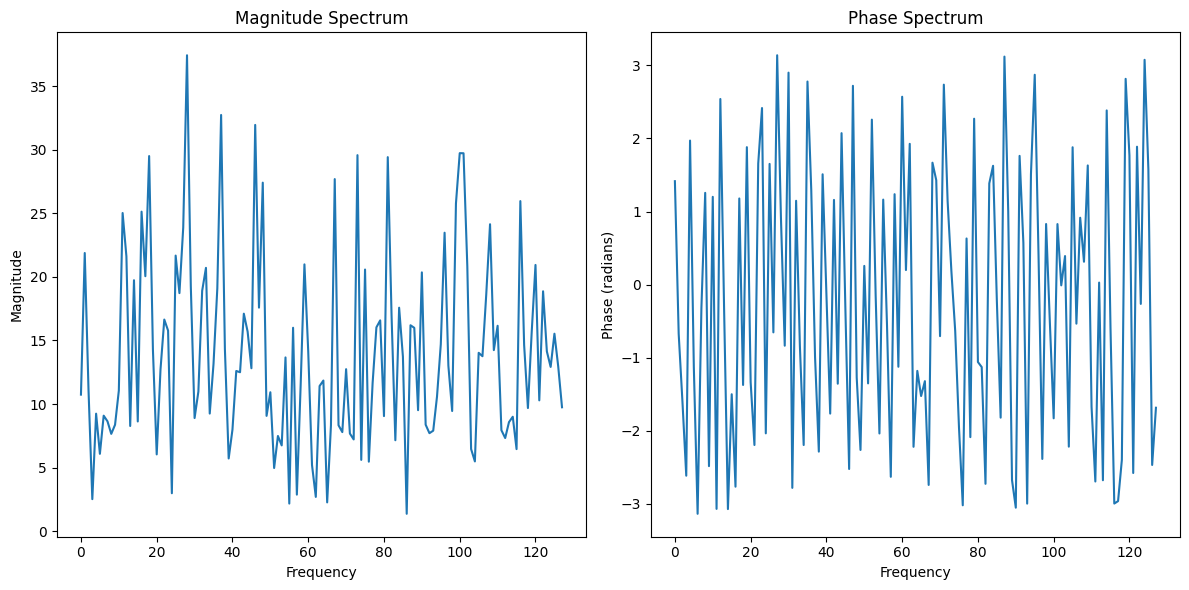

: 

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 4. 绘制频谱图
plt.figure(figsize=(12, 6))

# 绘制幅度频谱
plt.subplot(1, 2, 1)
plt.plot(magnitude_spectrum)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# 绘制相位频谱
plt.subplot(1, 2, 2)
plt.plot(phase_spectrum)
plt.title('Phase Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()
